# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
# pprint(f"The weather API responded with: {weather_json}.")
pprint(weather_json)


{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1619802171,
 'id': 2643743,
 'main': {'feels_like': 281.74,
          'humidity': 46,
          'pressure': 1014,
          'temp': 283.45,
          'temp_max': 285.93,
          'temp_min': 280.93},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1619757233,
         'sunset': 1619810479,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 3.09}}


In [5]:
weather_json['coord']['lon']

-0.1257

In [6]:
weather_json['coord']['lat']

51.5085

In [7]:
weather_json['wind']['speed']

3.09

In [8]:
weather_json['main']['temp_max']

285.93

In [9]:
weather_json['clouds']['all']

98

In [10]:
weather_json['main']['humidity']

46

In [11]:
weather_json['sys']['country']

'GB'

In [12]:
weather_json['dt']

1619802171

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#list to hold the column for future dataframe
lats=[]
lngs=[]
wind_speeds=[]
max_temps=[]
cloudiness=[]
humidity=[]
countries=[]
dates=[]
city_names=[]

#Create for loops
for city in cities:
    
    try:
        
        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + city

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # Get the temperature from the response
        # pprint(f"The weather API responded with: {weather_json}.")
        # pprint(weather_json)
        lngs.append(weather_json['coord']['lon'])
        lats.append(weather_json['coord']['lat'])
        wind_speeds.append(weather_json['wind']['speed'])
        max_temps.append(weather_json['main']['temp_max'])
        cloudiness.append(weather_json['clouds']['all'])
        humidity.append(weather_json['main']['humidity'])
        countries.append(weather_json['sys']['country'])
        dates.append(weather_json['dt'])
        city_names.append(city)
        print(f"{city} was successfully added to our records")
    except:
        print(f"We failed to add {city}")

manado was successfully added to our records
trelew was successfully added to our records
alakurtti was successfully added to our records
ushuaia was successfully added to our records
port alfred was successfully added to our records
guerrero negro was successfully added to our records
turkistan was successfully added to our records
We failed to add tsihombe
souillac was successfully added to our records
We failed to add macaboboni
mamakan was successfully added to our records
thompson was successfully added to our records
guadalajara was successfully added to our records
busselton was successfully added to our records
hilo was successfully added to our records
praia da vitoria was successfully added to our records
trairi was successfully added to our records
fortuna was successfully added to our records
churapcha was successfully added to our records
tuatapere was successfully added to our records
dikson was successfully added to our records
arraial do cabo was successfully added to o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Create DataFrame
city_df=pd.DataFrame({
    "City":city_names,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates    
})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manado,1.4870,124.8455,297.15,100,20,0.51,ID,1619802526
1,trelew,-43.2490,-65.3051,296.77,16,77,4.16,AR,1619802527
2,alakurtti,66.9672,30.3491,272.04,50,100,2.68,RU,1619802293
3,ushuaia,-54.8000,-68.3000,278.15,81,75,0.51,AR,1619802527
4,port alfred,-33.5906,26.8910,290.44,75,55,7.04,ZA,1619802527
...,...,...,...,...,...,...,...,...,...
554,kutum,14.2000,24.6667,303.37,12,9,3.56,SD,1619802655
555,port talbot,51.5924,-3.7802,282.59,72,61,2.77,GB,1619802597
556,siderno,38.2779,16.3020,293.71,88,20,2.06,IT,1619802656
557,kantang,7.4054,99.5156,298.20,90,100,1.31,TH,1619802656


In [15]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.579901,17.519347,290.437496,66.060823,51.855098,3.798623,1.619803e+09
std,32.735756,92.310917,11.319555,23.731395,37.931821,2.512098,9.744278e+01
min,-54.800000,-179.166700,253.710000,3.000000,0.000000,0.340000,1.619802e+09
25%,-5.281250,-66.077550,282.150000,49.000000,14.500000,1.910000,1.619803e+09
50%,26.729200,22.677800,292.980000,71.000000,54.000000,3.100000,1.619803e+09
75%,47.560250,101.498750,299.150000,86.000000,90.000000,5.140000,1.619803e+09
max,78.218600,178.416700,314.260000,100.000000,100.000000,15.950000,1.619803e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#Dataframe to show cities wth humidity greater than 100
city_df[city_df["Humidity"]>100] #Verified that there are no cities with humidity greater than 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
city_df.to_csv("City_Weather.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
city_df=pd.read_csv("City_Weather.csv").drop("Unnamed: 0", axis=1)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manado,1.4870,124.8455,297.15,100,20,0.51,ID,1619802526
1,trelew,-43.2490,-65.3051,296.77,16,77,4.16,AR,1619802527
2,alakurtti,66.9672,30.3491,272.04,50,100,2.68,RU,1619802293
3,ushuaia,-54.8000,-68.3000,278.15,81,75,0.51,AR,1619802527
4,port alfred,-33.5906,26.8910,290.44,75,55,7.04,ZA,1619802527
...,...,...,...,...,...,...,...,...,...
554,kutum,14.2000,24.6667,303.37,12,9,3.56,SD,1619802655
555,port talbot,51.5924,-3.7802,282.59,72,61,2.77,GB,1619802597
556,siderno,38.2779,16.3020,293.71,88,20,2.06,IT,1619802656
557,kantang,7.4054,99.5156,298.20,90,100,1.31,TH,1619802656


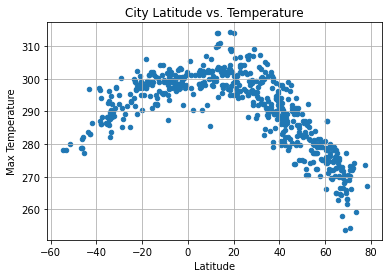

In [19]:
#City Latitude vs Temperature Plot
city_df.plot(kind='scatter', x='Lat', y='Max Temp', facecolors='blue')
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")

            

## Latitude vs. Humidity Plot

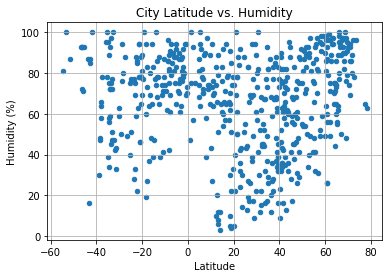

In [20]:
#City Latitude vs. Humidity Plot
city_df.plot(kind='scatter', x='Lat', y='Humidity', facecolors='blue')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../output_data/City Latitude vs. Humidity.png")
        

## Latitude vs. Cloudiness Plot

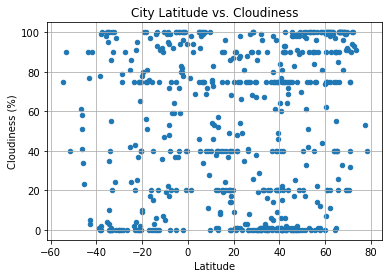

In [21]:
#City Latitude vs. Cloudiness Plot
city_df.plot(kind='scatter', x='Lat', y='Cloudiness', facecolors='blue')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")
        

## Latitude vs. Wind Speed Plot

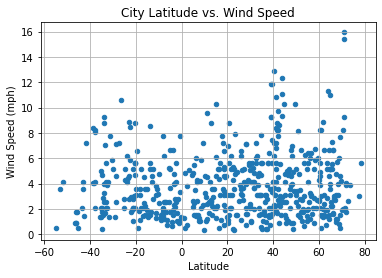

In [22]:
#City Latitude vs. Wind Speed Plot
city_df.plot(kind='scatter', x='Lat', y='Wind Speed', facecolors='blue')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")
        

## Linear Regression

In [23]:
#Create Linear Regression plots
#Define northern and southern hemispheres
northern_hemisphere=city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) > 0, :]
southern_hemisphere=city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =-0.56x + 310.48.
The r-squared is: -0.8710527990808322
The regression displays a negative correlation.
In the Northern Hemisphere, this plot shows that the temperature decreases while the latitude increases.


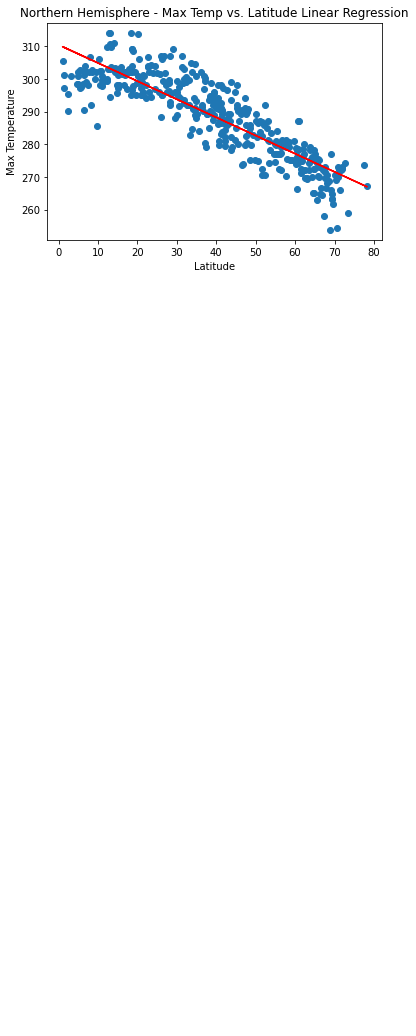

In [32]:
#Define Northern Hemisphere - Max Temp vs. Latitude Linear Reg
x = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/North Hemispehere Max Temp vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the Northern Hemisphere, this plot shows that the temperature decreases while the latitude increases.")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =0.37x + 302.41.
The r-squared is: 0.7772501800972152
The regression displays a positive correlation.
In the Southern Hemisphere, this plot shows that the temperature increases as getting closer to the equator.


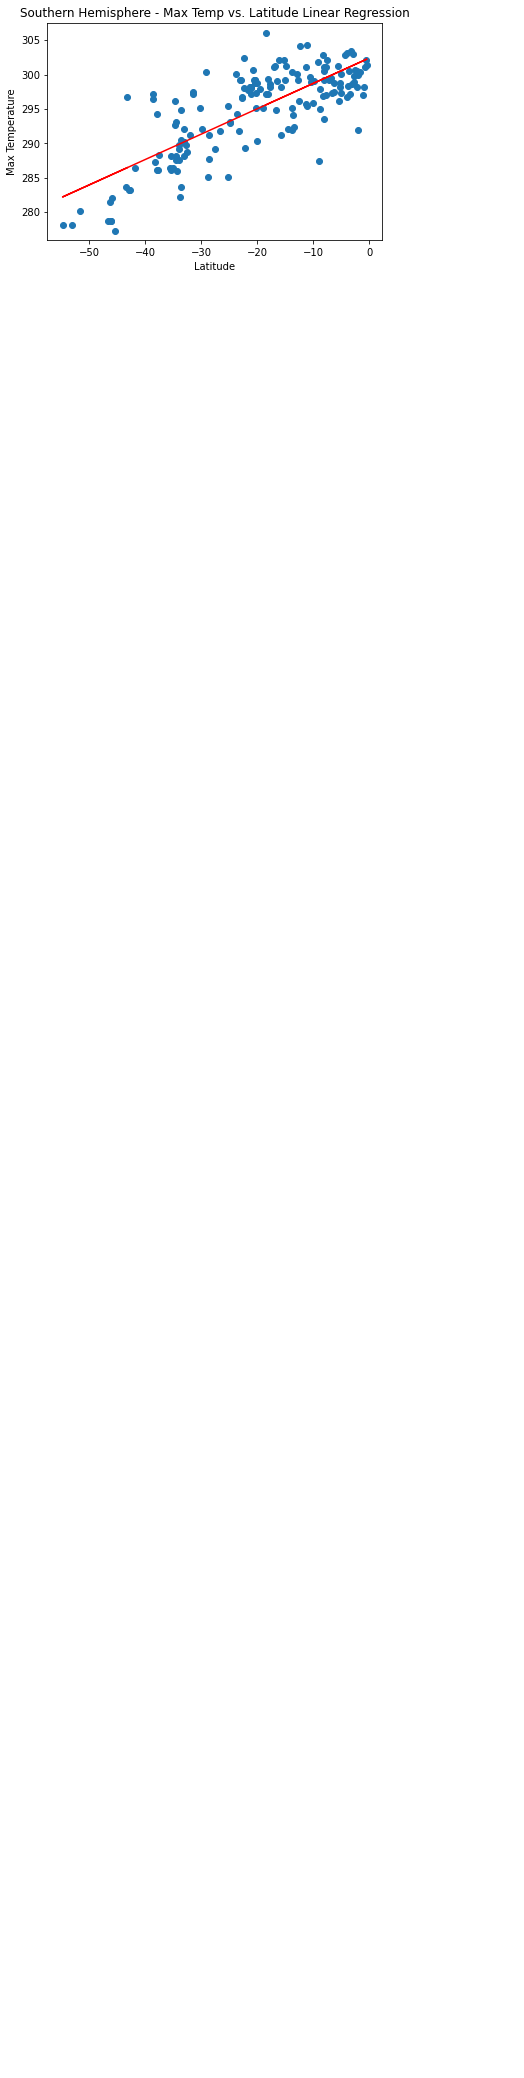

In [33]:
#Define Southern Hemisphere - Max Temp vs. Latitude Linear Reg
x = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/South Hemisphere Max Temp vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows that the temperature increases as getting closer to the equator.")
    

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.32x + 50.89.
The r-squared is: 0.24775570504402478
The regression displays a positive correlation.
In the Northern Hemisphere, this plot cannot determine humidity in relation to latitude.


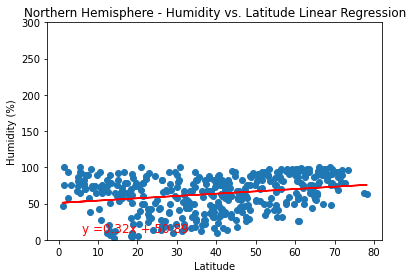

In [34]:
#Define Northern Hemisphere - Humidity vs. Latitude Linear Reg
x = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,300)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../output_data/North Hemisphere Humidity vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Northern Hemisphere, this plot cannot determine humidity in relation to latitude.")
    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.17x + 75.78.
The r-squared is: 0.12136383043808839
The regression displays a positive correlation.
In the Southern Hemisphere, this plot shows that the latitude does not impact the humidity.


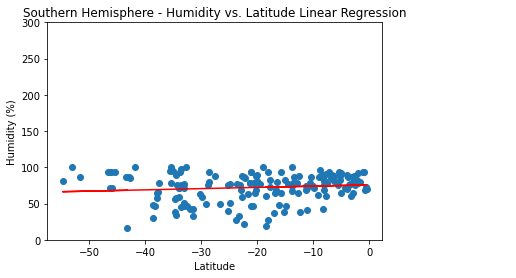

In [35]:
#Define Southern Hemisphere - Humidity vs. Latitude Linear Reg
x = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,300)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("../output_data/South Hemisphere Humidity vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows that the latitude does not impact the humidity.")
    

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.37x + 37.7.
The r-squared is: 0.18996008384129934
The regression displays a positive correlation.
In the Northern Hemisphere, this plot shows cloudiness slightly increases with an increase in in latitude.


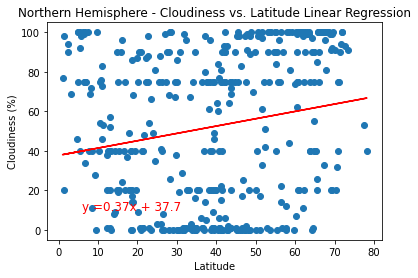

In [36]:
#Define Northern Hemisphere - Cloudiness vs. Latitude Linear Reg
x = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../output_data/North Hemisphere Cloudiness vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Northern Hemisphere, this plot shows cloudiness slightly increases with an increase in in latitude.")
    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.49x + 60.87.
The r-squared is: 0.17389480455379047
The regression displays a positive correlation.
In the Southern Hemisphere, this plot shows cloudiness increases as closer to equator.


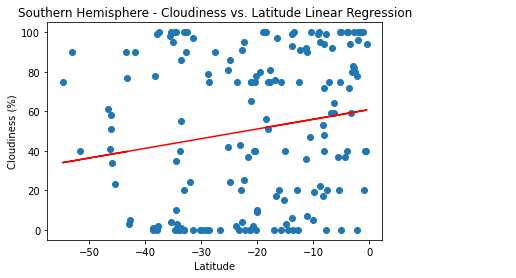

In [38]:
#Define Southern Hemisphere - Cloudiness vs. Latitude Linear Reg
x = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("../output_data/South Hemisphere Cloudiness vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows cloudiness increases as closer to equator.")
    

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =0.01x + 3.45.
The r-squared is: 0.09295328381074791
The regression displays a positive correlation.
In the Northern Hemisphere, this plot shows wind speed stays relatively constant as latitude increases.


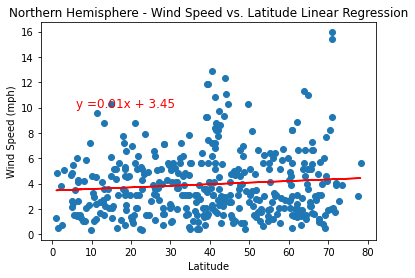

In [39]:
#Define Northern Hemisphere - Wind Speed vs. Latitude Linear Reg
x = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("../output_data/North Hemisphere Wind Speed vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Northern Hemisphere, this plot shows wind speed stays relatively constant as latitude increases.")
    

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.02x + 3.11.
The r-squared is: -0.10209507543659253
The regression displays a negative correlation.
In the Southern Hemisphere, this plot shows wind speed decreases as it approaches the equator.


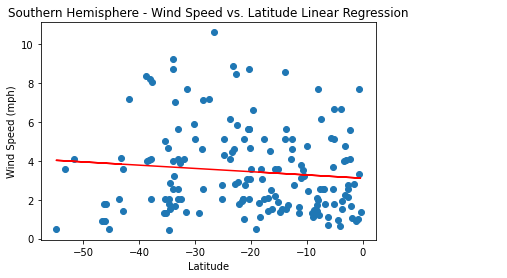

In [40]:
#Define Southern Hemisphere - Wind Speed vs. Latitude Linear Reg
x = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("../output_data/South Hemisphere Wind Speed vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the Southern Hemisphere, this plot shows wind speed decreases as it approaches the equator.")
    